In [71]:
import numpy as np
import pandas as pd
import re

In [72]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [73]:
df = pd.read_csv('final_properties_cleaned_v1.csv')

In [74]:
df.duplicated().sum()

121

In [75]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,tata primanti,sector 72,3.9,13425.0,2905.0,Super Built up area 2905(269.88 sq.m.)Carpet area: 2150 sq.ft. (199.74 sq.m.),4,4,3+,"servant room,others",39.0,East,1 to 5 Year Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']","['7 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


## 1. areaWithType

In [76]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2663,6.00,2700.0,Plot area 300(250.84 sq.m.)
1122,0.75,1342.0,Super Built up area 1342(124.68 sq.m.)Built Up area: 1140 sq.ft. (105.91 sq.m.)Carpet area: 969 sq.ft. (90.02 sq.m.)
916,0.49,735.0,Super Built up area 735(68.28 sq.m.)Built Up area: 700 sq.ft. (65.03 sq.m.)Carpet area: 635 sq.ft. (58.99 sq.m.)
479,0.75,1095.0,Plot area 1095(101.73 sq.m.)
2972,0.35,583.0,Super Built up area 583(54.16 sq.m.)


In [77]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [78]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [79]:
get_super_built_up_area('Super Built up area 2575(239.23 sq.m.)')

2575.0

In [80]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [81]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [82]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
664,1.02,flat,1260.0,Super Built up area 1260(117.06 sq.m.)Built Up area: 1250 sq.ft. (116.13 sq.m.)Carpet area: 800 sq.ft. (74.32 sq.m.),1260.0,1250.0,800.00
3179,2.50,flat,2149.0,Super Built up area 2149(199.65 sq.m.),2149.0,NaN,NaN
323,1.40,flat,1650.0,Super Built up area 1650(153.29 sq.m.)Built Up area: 1300 sq.ft. (120.77 sq.m.)Carpet area: 1022.58 sq.ft. (95 sq.m.),1650.0,1300.0,1022.58
530,1.92,flat,2400.0,Super Built up area 2400(222.97 sq.m.),2400.0,NaN,NaN
1845,10.00,house,435.0,Carpet area: 435 (40.41 sq.m.),NaN,NaN,435.00


In [83]:
df.duplicated().sum()

121

In [84]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [85]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
13,1.50,house,1170.0,Plot area 130(108.7 sq.m.),NaN,NaN,NaN
18,0.75,house,600.0,Plot area 600(55.74 sq.m.),NaN,NaN,NaN
25,11.00,house,4125.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
27,8.40,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN


In [86]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [87]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [88]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,NaN,NaN
13,1.50,house,1170.0,Plot area 130(108.7 sq.m.),NaN,NaN,NaN
18,0.75,house,600.0,Plot area 600(55.74 sq.m.),NaN,NaN,NaN
25,11.00,house,4125.0,Plot area 500(418.06 sq.m.),NaN,NaN,NaN
27,8.40,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN


In [89]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [90]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [91]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [92]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
13,1.50,house,1170.0,Plot area 130(108.7 sq.m.),NaN,130.00,NaN
18,0.75,house,600.0,Plot area 600(55.74 sq.m.),NaN,600.00,NaN
25,11.00,house,4125.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
27,8.40,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
32,12.00,house,3150.0,Plot area 350(292.64 sq.m.),NaN,350.00,NaN
41,12.00,house,3150.0,Plot area 350(292.64 sq.m.),NaN,350.00,NaN
47,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,624.00,NaN
50,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
67,2.90,house,2500.0,Plot area 2500(232.26 sq.m.),NaN,2500.00,NaN


In [93]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [94]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [95]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
8,8.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,4518.00,NaN
13,1.50,house,1170.0,Plot area 130(108.7 sq.m.),NaN,1170.00,NaN
18,0.75,house,600.0,Plot area 600(55.74 sq.m.),NaN,600.00,NaN
25,11.00,house,4125.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
27,8.40,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
32,12.00,house,3150.0,Plot area 350(292.64 sq.m.),NaN,3150.00,NaN
41,12.00,house,3150.0,Plot area 350(292.64 sq.m.),NaN,3150.00,NaN
47,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,624.00,NaN
50,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.00,NaN
67,2.90,house,2500.0,Plot area 2500(232.26 sq.m.),NaN,2500.00,NaN


In [96]:
# update the original dataframe
df.update(all_nan_df)

In [97]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [98]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,tata primanti,sector 72,3.90,13425.0,2905.0,Super Built up area 2905(269.88 sq.m.)Carpet area: 2150 sq.ft. (199.74 sq.m.),4,4,3+,"servant room,others",39.0,East,1 to 5 Year Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']","['7 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2905.0,NaN,2150.0
1,flat,krrish provence estate,gwal pahari,7.50,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,"pooja room,servant room,others",23.0,North-East,1 to 5 Year Old,"['Tniy Toons School', 'Pathways School Gurgoan', ""Mother's Love English School"", 'SDMC Primary School', 'SBI ATM', 'HDFC Bank ATM', 'Axis bank ATM', 'Citibank ATM', 'ICICI bank ATM', 'Janki Max Hospital', ""Buddy's Point"", 'Unique Dhaba', 'The brown Saheb', 'French Heart Bakery', 'Lassi cafe Restaurant']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",10000.0,NaN,NaN
2,flat,bptp terra,sector 37d,1.65,8790.0,1877.0,Super Built up area 1877(174.38 sq.m.),3,3,2,not available,15.0,East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['1 Chimney', '2 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1877.0,NaN,NaN
3,flat,la lagune,sector 54,6.75,21360.0,3160.0,Super Built up area 3160(293.57 sq.m.)Built Up area: 2455 sq.ft. (228.08 sq.m.)Carpet area: 2240 sq.ft. (208.1 sq.m.),4,6,3+,servant room,11.0,East,5 to 10 Year Old,"['Sector 54 Chowk Metro Station', 'Ardee Mall', 'Golf course extension road', 'Gurugram Public School', 'BM College of Technology', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Kheri Railway station', 'Ernst & Young', 'Zooper India Trampoline Park']","['5 Wardrobe', '8 Fan', '5 Geyser', '1 Stove', '12 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 

## 2.additionalRoom

In [99]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [100]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [101]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2951,not available,0,0,0,0,0
3688,"store room,pooja room,servant room,study room",1,1,1,1,0
3411,not available,0,0,0,0,0
599,servant room,0,1,0,0,0
2328,not available,0,0,0,0,0


In [102]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,tata primanti,sector 72,3.90,13425.0,2905.0,Super Built up area 2905(269.88 sq.m.)Carpet area: 2150 sq.ft. (199.74 sq.m.),4,4,3+,"servant room,others",39.0,East,1 to 5 Year Old,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']","['7 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2905.0,NaN,2150.0,0,1,0,0,1
1,flat,krrish provence estate,gwal pahari,7.50,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,"pooja room,servant room,others",23.0,North-East,1 to 5 Year Old,"['Tniy Toons School', 'Pathways School Gurgoan', ""Mother's Love English School"", 'SDMC Primary School', 'SBI ATM', 'HDFC Bank ATM', 'Axis bank ATM', 'Citibank ATM', 'ICICI bank ATM', 'Janki Max Hospital', ""Buddy's Point"", 'Unique Dhaba', 'The brown Saheb', 'French Heart Bakery', 'Lassi cafe Restaurant']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",10000.0,NaN,NaN,0,1,0,1,1
2,flat,bptp terra,sector 37d,1.65,8790.0,1877.0,Super Built up area 1877(174.38 sq.m.),3,3,2,not available,15.0,East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['1 Chimney', '2 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1877.0,NaN,NaN,0,0,0,0,0
3,flat,la lagune,sector 54,6.75,21360.0,3160.0,Super Built up area 3160(293.57 sq.m.)Built Up area: 2455 sq.ft. (228.08 sq.m.)Carpet area: 2240 sq.ft. (208.1 sq.m.),4,6,3+,servant room,11.0,East,5 to 10 Year Old,"['Sector 54 Chowk Metro Station', 'Ardee Mall', 'Golf course extension road', 'Gurugram Public School', 'BM College of Technology', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Kheri Railway station', 'Ernst & Young', 'Zooper India Trampoline Park']","['5 Wardrobe', '8 Fan', '5 Geyser', '1 Stove', '12 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel'

## 3.agePossession

In [103]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec-23                  22
By 2023                 19
By 2024                 17
Dec-24                  16
Mar-24                  14
Oct-24                   8
Jan-24                   8
Jun-24                   7
Aug-23                   7
Dec-25                   7
Nov-23                   5
Sep-23                   4
By 2025                  4
Oct-23                   4
Aug-24                   4
Jul-24                   4
May-24                   3
Nov-24                   3
Jan-25                   3
Feb-24                   3
Sep-25                   2
Jan-26                   2
Apr-26                   2
Dec-26                   2
Jun-27                   2
Jul-25                   2
By 2027                  2
Oct-25                   2
Aug-25        

In [104]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [105]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [106]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              484
Old Property           310
Under Construction     132
Name: count, dtype: int64

In [107]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,tata primanti,sector 72,3.90,13425.0,2905.0,Super Built up area 2905(269.88 sq.m.)Carpet area: 2150 sq.ft. (199.74 sq.m.),4,4,3+,"servant room,others",39.0,East,Relatively New,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']","['7 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2905.0,NaN,2150.0,0,1,0,0,1
1,flat,krrish provence estate,gwal pahari,7.50,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,"pooja room,servant room,others",23.0,North-East,Relatively New,"['Tniy Toons School', 'Pathways School Gurgoan', ""Mother's Love English School"", 'SDMC Primary School', 'SBI ATM', 'HDFC Bank ATM', 'Axis bank ATM', 'Citibank ATM', 'ICICI bank ATM', 'Janki Max Hospital', ""Buddy's Point"", 'Unique Dhaba', 'The brown Saheb', 'French Heart Bakery', 'Lassi cafe Restaurant']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",10000.0,NaN,NaN,0,1,0,1,1
2,flat,bptp terra,sector 37d,1.65,8790.0,1877.0,Super Built up area 1877(174.38 sq.m.),3,3,2,not available,15.0,East,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['1 Chimney', '2 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1877.0,NaN,NaN,0,0,0,0,0
3,flat,la lagune,sector 54,6.75,21360.0,3160.0,Super Built up area 3160(293.57 sq.m.)Built Up area: 2455 sq.ft. (228.08 sq.m.)Carpet area: 2240 sq.ft. (208.1 sq.m.),4,6,3+,servant room,11.0,East,Moderately Old,"['Sector 54 Chowk Metro Station', 'Ardee Mall', 'Golf course extension road', 'Gurugram Public School', 'BM College of Technology', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Kheri Railway station', 'Ernst & Young', 'Zooper India Trampoline Park']","['5 Wardrobe', '8 Fan', '5 Geyser', '1 Stove', '12 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Na

## 4.furnishDetails

In [108]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2535,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
1986,NaN,['Park']
1673,"['5 Wardrobe', '7 Fan', '1 Exhaust Fan', '5 Geyser', '30 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
55,[],"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Separate entry for servant room', 'Park', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Fitness Centre / GYM']"
1520,"['2 Bed', '1 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Geyser', '5 Light', '1 Modular Kitchen', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting']"


In [109]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


In [110]:
furnishings_df.shape

(3803, 19)

In [111]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\priya\AppData\Local\Temp\ipykernel_37584\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [112]:
furnishings_df.sample(5)

,Curtains,Fridge,Exhaust Fan,Fan,Sofa,Washing Machine,AC,Water Purifier,Stove,TV,Chimney,Light,Wardrobe,Geyser,Dining Table,Microwave,Modular Kitchen,Bed
3307,0,0,1,5,0,0,3,0,1,0,1,7,0,3,0,0,1,0
3449,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2479,1,0,1,9,0,0,10,0,0,0,1,26,6,7,0,0,1,0
3278,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1206,1,0,1,5,0,0,0,0,0,0,1,5,3,2,0,0,1,0


In [113]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [115]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

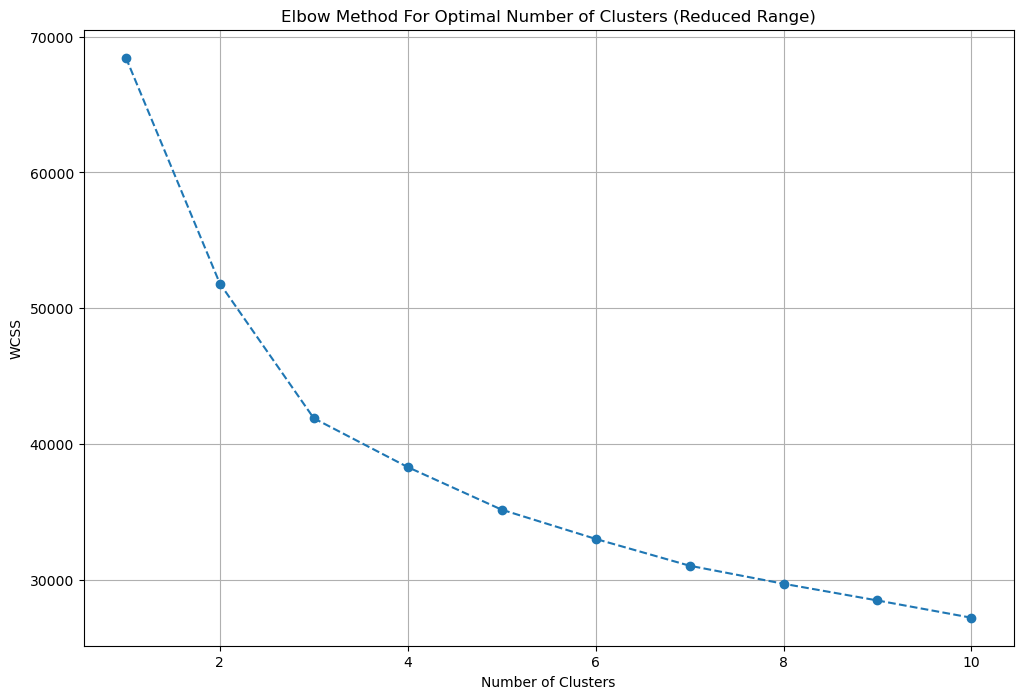

In [116]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [117]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(


In [118]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,Curtains,Fridge,Exhaust Fan,Fan,Sofa,Washing Machine,AC,Water Purifier,Stove,TV,Chimney,Light,Wardrobe,Geyser,Dining Table,Microwave,Modular Kitchen,Bed
0,flat,tata primanti,sector 72,3.90,13425.0,2905.0,Super Built up area 2905(269.88 sq.m.)Carpet area: 2150 sq.ft. (199.74 sq.m.),4,4,3+,"servant room,others",39.0,East,Relatively New,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']","['7 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2905.0,NaN,2150.0,0,1,0,0,1,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,1,0
1,flat,krrish provence estate,gwal pahari,7.50,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,"pooja room,servant room,others",23.0,North-East,Relatively New,"['Tniy Toons School', 'Pathways School Gurgoan', ""Mother's Love English School"", 'SDMC Primary School', 'SBI ATM', 'HDFC Bank ATM', 'Axis bank ATM', 'Citibank ATM', 'ICICI bank ATM', 'Janki Max Hospital', ""Buddy's Point"", 'Unique Dhaba', 'The brown Saheb', 'French Heart Bakery', 'Lassi cafe Restaurant']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",10000.0,NaN,NaN,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,flat,bptp terra,sector 37d,1.65,8790.0,1877.0,Super Built up area 1877(174.38 sq.m.),3,3,2,not available,15.0,East,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['1 Chimney', '2 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1877.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0
3,flat,la lagune,sector 54,6.75,21360.0,3160.0,Super Built up area 3160(293.57 sq.m.)Built Up area: 2455 sq.ft. (228.08 sq.m.)Carpet area: 2240 sq.ft. (208.1 sq.m.),4,6,3+,servant room,11.0,East,Moderately Old,"['Sector 54 Chowk Metro Station', 'Ardee Mall', 'Golf course extension road', 'Gurugram Public School', 'BM College of Technology', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Kheri Railway station', 'Ernst & Young', 'Zooper India Trampoline Park']","['5 Wardrobe', '8 Fan', '5 Geyser', '1 Stove', '12 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security 

In [119]:
df = df.iloc[:,:-18]

In [120]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,tata primanti,sector 72,3.90,13425.0,2905.0,Super Built up area 2905(269.88 sq.m.)Carpet area: 2150 sq.ft. (199.74 sq.m.),4,4,3+,"servant room,others",39.0,East,Relatively New,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']","['7 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2905.0,NaN,2150.0,0,1,0,0,1
1,flat,krrish provence estate,gwal pahari,7.50,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,"pooja room,servant room,others",23.0,North-East,Relatively New,"['Tniy Toons School', 'Pathways School Gurgoan', ""Mother's Love English School"", 'SDMC Primary School', 'SBI ATM', 'HDFC Bank ATM', 'Axis bank ATM', 'Citibank ATM', 'ICICI bank ATM', 'Janki Max Hospital', ""Buddy's Point"", 'Unique Dhaba', 'The brown Saheb', 'French Heart Bakery', 'Lassi cafe Restaurant']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",10000.0,NaN,NaN,0,1,0,1,1
2,flat,bptp terra,sector 37d,1.65,8790.0,1877.0,Super Built up area 1877(174.38 sq.m.),3,3,2,not available,15.0,East,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['1 Chimney', '2 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1877.0,NaN,NaN,0,0,0,0,0
3,flat,la lagune,sector 54,6.75,21360.0,3160.0,Super Built up area 3160(293.57 sq.m.)Built Up area: 2455 sq.ft. (228.08 sq.m.)Carpet area: 2240 sq.ft. (208.1 sq.m.),4,6,3+,servant room,11.0,East,Moderately Old,"['Sector 54 Chowk Metro Station', 'Ardee Mall', 'Golf course extension road', 'Gurugram Public School', 'BM College of Technology', 'Paras Hospital', 'IGI Airport', 'DLF Golf and Country Club', 'Kheri Railway station', 'Ernst & Young', 'Zooper India Trampoline Park']","['5 Wardrobe', '8 Fan', '5 Geyser', '1 Stove', '12 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Na

In [121]:
df['furnishing_type'] = cluster_assignments

In [122]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
3362,"['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
2083,NaN,2
3404,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
1819,"['1 Water Purifier', '8 Fan', '1 Exhaust Fan', '2 Geyser', '1 Stove', '13 Light', '4 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '2 Wardrobe', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",0
962,NaN,2


## 5.features

In [123]:
df[['society','features']].sample(5)

,society,features
536,dlf the ultima,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2675,dlf park place,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2319,vipul tatvam villa,"['Private Garden / Terrace', 'Maintenance Staff', 'Piped-gas', 'Visitor Parking', 'Airy Rooms', 'Club house / Community Center']"
3626,sare crescent parc,"['Intercom Facility', 'Lift(s)', 'Park']"
2415,shapoorji pallonji joyville gurugram,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"


In [124]:
df['features'].isnull().sum()

635

In [125]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [126]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [127]:
temp_df = df[df['features'].isnull()]

In [128]:
temp_df.shape

(635, 26)

In [129]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [130]:
x.head()

0                                                                                                                                                 NaN
1    ['Mini Theatre', 'Swimming Pool', 'Bar/Chill-Out Lounge', 'Business Lounge', 'Cigar Lounge', 'Golf Course', 'School', 'Card Room', 'Restaurant']
2                                                                                                                                                 NaN
3                                ['Swimming Pool', 'Lounge', 'Reflexology Park', 'School', 'Aerobics Centre', 'Card Room', 'Sauna', 'Jacuzzi', 'Spa']
4                                                                                                                                                 NaN
Name: TopFacilities, dtype: object

In [131]:
df.loc[temp_df.index,'features'] = x.values

In [132]:
df['features'].isnull().sum()

481

In [133]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [134]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [135]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2650,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
464,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
3242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [136]:
features_binary_df.shape

(3803, 130)

In [137]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=15.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environm

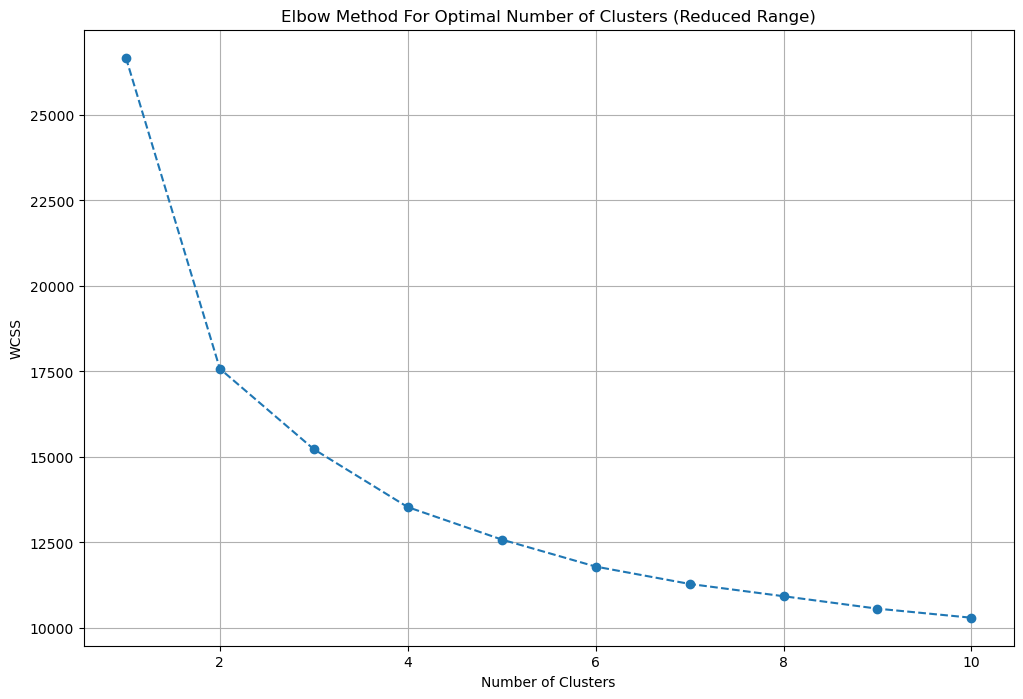

In [138]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [139]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [140]:
df['luxury_score'] = luxury_score

In [141]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,tata primanti,sector 72,3.90,13425.0,2905.0,Super Built up area 2905(269.88 sq.m.)Carpet area: 2150 sq.ft. (199.74 sq.m.),4,4,3+,"servant room,others",39.0,East,Relatively New,"['Sector 55-56 Metro Station', 'Omaxe City Centre', 'Sohna Gurgaon Road', 'Faridabad Gurgaon Road', 'Pallavan PreSchool, Sohna Road', 'RBSM Public school', 'Polaris Hospital', 'Spaze Itech Park', 'Radisson Hotel Gurugram Sohna Road', 'SkyJumper Trampoline Park Gurgaon']","['7 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2905.0,NaN,2150.0,0,1,0,0,1,2,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
1,flat,krrish provence estate,gwal pahari,7.50,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,"pooja room,servant room,others",23.0,North-East,Relatively New,"['Tniy Toons School', 'Pathways School Gurgoan', ""Mother's Love English School"", 'SDMC Primary School', 'SBI ATM', 'HDFC Bank ATM', 'Axis bank ATM', 'Citibank ATM', 'ICICI bank ATM', 'Janki Max Hospital', ""Buddy's Point"", 'Unique Dhaba', 'The brown Saheb', 'French Heart Bakery', 'Lassi cafe Restaurant']",NaN,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",10000.0,NaN,NaN,0,1,0,1,1,2,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
2,flat,bptp terra,sector 37d,1.65,8790.0,1877.0,Super Built up area 1877(174.38 sq.m.),3,3,2,not available,15.0,East,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Course Extension Road', 'Euro International School', 'DPG Institute of Technology', 'Medanta -The Medicity', 'Amma Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'Holiday Inn Sector 90', 'SkyJumper Trampoline Park']","['1 Chimney', '2 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Private Garden / Terrace', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']",1877.0,NaN,NaN,0,0,0,0,0,2,"[Security / Fire Alarm, Power Back-up, Private Garden / Terrace, Lift(s), Water purifier, High Ceiling Height, Maintenance Staff, Water Storage, No open drainage around, Bank Attached Property, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Shopping Centre, Fitness Centre / GYM, Waste Disposal, Rain Water Harvesting, Club house / Community Center]",116
3,flat,la lagune,sector 54,6.75,21360.0,3160.0,Super Built up area 3160(293.57 sq.m.)Built Up area: 2455 sq.ft. (228.08 sq.m.)Carpet area: 2240 sq.ft. (208.1 sq.m.),4,6,3+,servant room,11.0,East,Moderately Old,"['Sector 54 Chowk Metro Station', 'Ardee Mall', 'Golf course extensi

In [142]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [143]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1801,flat,ambience creacions,sector 22,2.00,14492.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2,2,2,9.0,East,Relatively New,NaN,NaN,1380.0,0,0,0,0,0,2,49
2381,house,vipul tatvam villa,sector 48,5.75,22184.0,2592.0,Plot area 288(240.8 sq.m.)Built Up area: 280 sq.yards (234.12 sq.m.)Carpet area: 250 sq.yards (209.03 sq.m.),4,4,2,2.0,West,Moderately Old,NaN,280.0,250.0,0,1,0,0,0,2,30
2954,house,independent,sector 25,13.50,37313.0,3618.0,Plot area 402(336.12 sq.m.),5,6,3+,4.0,North-East,Old Property,NaN,3618.0,NaN,0,0,0,0,1,0,79
3643,flat,m3m golf hills phase 1,sector 79,1.70,10828.0,1570.0,Built Up area: 1570 (145.86 sq.m.)Carpet area: 1099 sq.ft. (102.1 sq.m.),3,2,3,10.0,NaN,Undefined,NaN,1570.0,1099.0,0,0,0,0,0,2,0
929,flat,sare homes,sector 92,1.19,5219.0,2280.0,Carpet area: 2280 (211.82 sq.m.),4,3,3,14.0,North,Relatively New,NaN,NaN,2280.0,0,1,0,0,0,2,100


In [144]:
df.shape

(3803, 23)

In [145]:
df.to_csv('final_properties_cleaned_v2.csv',index=False)